<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

---

# 📝 Assignment

# 🌱 **기본 과제**

## **Part 1. K-Means Clustering**

### **1-1. 데이터셋 불러오기**

- `n133a-dataset.csv`를 불러와 `df`라는 데이터프레임에 저장하세요. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files

files.upload();

Saving n133a-dataset.csv to n133a-dataset.csv


In [ ]:
df = pd.read_csv('n133a-dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.2419,0.07871,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.1812,0.05667,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.2069,0.05999,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2597,0.09744,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1809,0.05883,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.2364,0.07678,NaN


In [ ]:
len(df.columns)

25

### **1-2. EDA**

- `diagnosis` column에 있는 데이터를 M은 1, B는 0으로 바꾼 뒤, `label`이라는 변수에 저장하세요.
> M = malignant, B = benign

- `df`에서 `radius_mean` ~ `fractal_dimension_worst` column만 남기고, 나머지 column은 제거하세요.


- `df`의 통계치를 확인하고, 모든 column에 log tranformation을 적용한 `df_log` 데이터프레임을 생성하세요. 

- 데이터의 단위에 따른 왜곡을 방지하기 위해 `df_log`에 `StandardScaler()`를 적용하여 `features`라는 변수에 저장하세요.


##### **Q1. 주어진 조건에 따라 column을 제거한 `df`의 shape을 쓰세요.**

In [ ]:
for index, row in enumerate(df['diagnosis']):
  if row == 'M':
    df.iloc[index, 1] = 1
  else:
    df.iloc[index, 1] = 0

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.2419,0.07871,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.1812,0.05667,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.2069,0.05999,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2597,0.09744,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1809,0.05883,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.2364,0.07678,NaN


In [ ]:
label = df['diagnosis']
label

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: object

In [ ]:
df = df.drop(['Unnamed: 32', 'diagnosis', 'id'], axis=1)

df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,...,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,...,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,...,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,...,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,...,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.2364,0.07678


In [ ]:
df.shape

(569, 24)

In [ ]:
# 통계치 확인
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.181162,0.062798,0.405172,1.216853,...,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.027414,0.007060,0.277313,0.551648,...,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.106000,0.049960,0.111500,0.360200,...,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.161900,0.057700,0.232400,0.833900,...,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.179200,0.061540,0.324200,1.108000,...,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.195700,0.066120,0.478900,1.474000,...,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.304000,0.097440,2.873000,4.885000,...,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,0.663800,0.207500


In [ ]:
# log transformation
ex = df.copy()

col_names = ex.columns

for col in col_names:
  ex[col] = np.log(ex[col])

ex.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,2.889816,2.339881,4.810557,6.908755,-2.133687,-1.281574,-1.419231,-2.541985,0.090754,-0.099489,...,-3.505558,-5.084336,3.233961,2.852439,5.218191,7.610358,-1.818925,-0.407066,-0.776311,-2.129472
1,3.023834,2.877512,4.889597,7.189922,-2.468168,-2.542875,-1.708154,-2.870510,-0.609726,-0.309382,...,-4.276586,-5.645891,3.218476,3.153163,5.067646,7.578657,-2.089088,-1.678788,-1.290984,-2.418894
2,2.980111,3.056357,4.867534,7.092574,-2.210918,-1.833207,-1.575520,-2.813577,-0.293566,-0.239654,...,-3.794240,-5.388023,3.159975,3.239854,5.027165,7.443664,-1.935168,-0.856843,-1.018047,-2.435203
3,2.435366,3.014554,4.351310,5.956096,-1.948413,-1.259133,-1.348228,-2.328518,-0.701986,0.144966,...,-2.819596,-4.687683,2.702032,3.277145,4.593806,6.341593,-1.561601,-0.143524,-0.409774,-1.754464
4,3.010128,2.663053,4.906015,7.167809,-2.299590,-2.018911,-1.709811,-2.833103,-0.278128,-0.246796,...,-4.042132,-5.275578,3.115292,2.813611,5.025195,7.362011,-1.984859,-1.584745,-1.442230,-2.566811


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


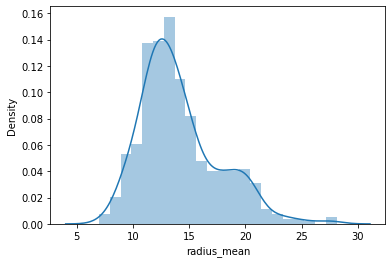

In [ ]:
sns.distplot(df['radius_mean']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


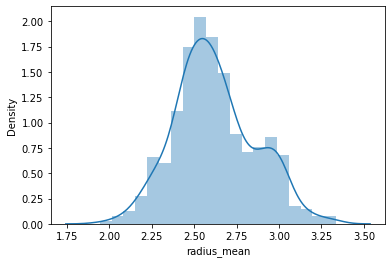

In [ ]:
sns.distplot(ex['radius_mean']);

##### **Q2. 표준화를 진행한 `features`에 대해 `features[0][0]`의 결과값을 반올림하여 소수점 둘째 자리까지 쓰세요.**

In [ ]:
scaler = StandardScaler()
features = scaler.fit_transform(ex)

In [ ]:
features

array([[ 1.1374323 , -2.69900693,  1.28110622, ...,  1.85386984,
         2.41145254,  1.88281732],
       [ 1.70058105, -0.26182372,  1.59617785, ..., -0.20822628,
        -0.16404918,  0.40324363],
       [ 1.51685566,  0.54891607,  1.50823153, ...,  1.12455679,
         1.20177229,  0.31987227],
       ...,
       [ 0.79953145,  1.81231964,  0.78022866, ...,  0.61171364,
        -1.23991737, -0.25924997],
       [ 1.706705  ,  2.0097551 ,  1.80648944, ...,  2.28456938,
         1.81864812,  2.09752222],
       [-2.39579218,  1.20145785, -2.47003466, ..., -1.93225777,
         0.05142714, -0.79714473]])

In [ ]:
round(features[0][0], 2)

1.14

### **1-3. K-Means Clustering 적용**

우리는 해당 데이터들을 두 개의 cluster로 군집화 한 후, 기존 데이터의 `label`과 그 결과를 비교해볼 것입니다.
  
- `n_clusters = 2`, `random_state = 42`를 제외한 다른 parameter는 default option을 사용하여 K-Means Clustering을 진행하세요.

- Clustering 결과로 나온 `labels`를 `df`의 `cluster` column에 저장하세요.

##### **Q3. `index`가 109인 데이터의 `cluster`를 쓰세요.**

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features)

df['cluster'] = kmeans.labels_

In [ ]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst,cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.2364,0.07678,1


In [ ]:
df.iloc[109, -1]

0

In [ ]:
df.loc[109, 'cluster']

0

### **1-4. Clustering 결과 해석**

- `df`의 `compactness_mean`, `perimeter_mean` column을 각각 x축, y축으로 두고 Clustering 결과를 `Scatter plot`으로 시각화해 보세요.
  - seaborn 라이브러리의 `.scatterplot()`에서 hue 파라미터를 설정하여, cluster 별로 데이터가 어디에 위치해 있는지 확인합니다.


##### **Q4. `scatterplot`에서 왼쪽 하단에 위치해있는 cluster는 무엇인지 쓰세요.**

- cluster 0
- cluster 1

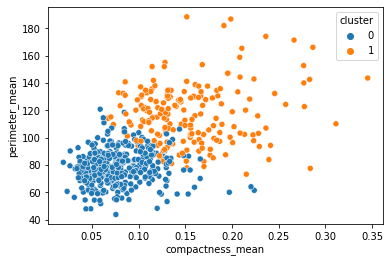

In [ ]:
sns.scatterplot(x='compactness_mean', y='perimeter_mean', data=df, hue='cluster');

## **Part 2. Accuracy**

- `df['cluster']`column을 `label2` 변수에 저장하세요.

- `label`과 `label2`의 값을 비교하여 전체 데이터 중 두 경우의 결과값이 일치하는 데이터의 비율을 `acc` 변수에 저장하세요.



##### **Q5. `acc` 결과값을 반올림하여 소수점 둘째 자리까지 쓰세요.**

In [ ]:
label2 = df['cluster']

In [ ]:
count = 0

for i in range(len(label)):
  if label[i] == label2[i]:
    count += 1

acc = count / len(label)

round(acc, 2)

0.93

# 🥇 **도전 과제** 

## **Part 3. Hierarhical Clustering**
- **다음 [링크](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)를 참고하여, Clustering 알고리즘 중 하나인 `Hierarhical Clustering`을 기본 과제의 데이터셋에 적용해보고, 그 결과로 나온 dendrogram을 시각화하세요.**

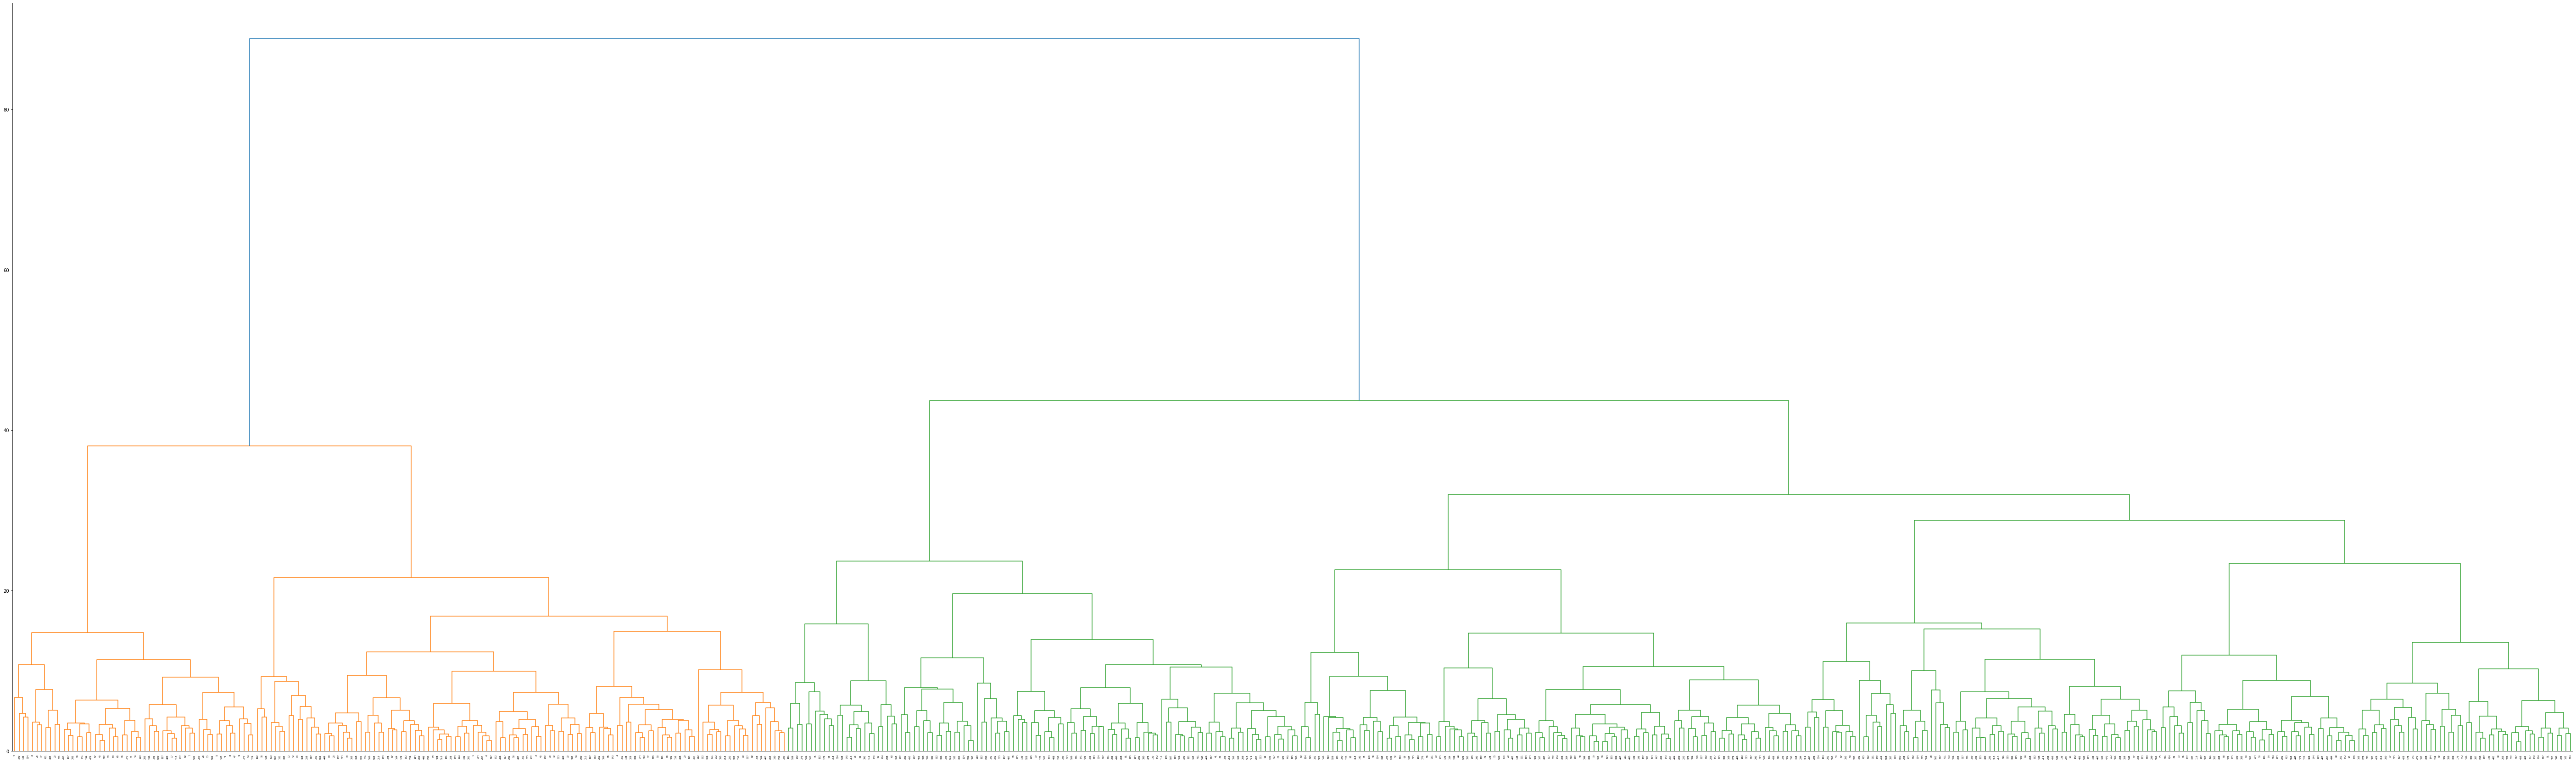

In [ ]:
from scipy.cluster import hierarchy

plt.figure(figsize=(100,30))
dend = hierarchy.dendrogram(hierarchy.linkage(features, method='ward')) # method 파라미터를 설정을 바꿔 가며 살펴보세요. 

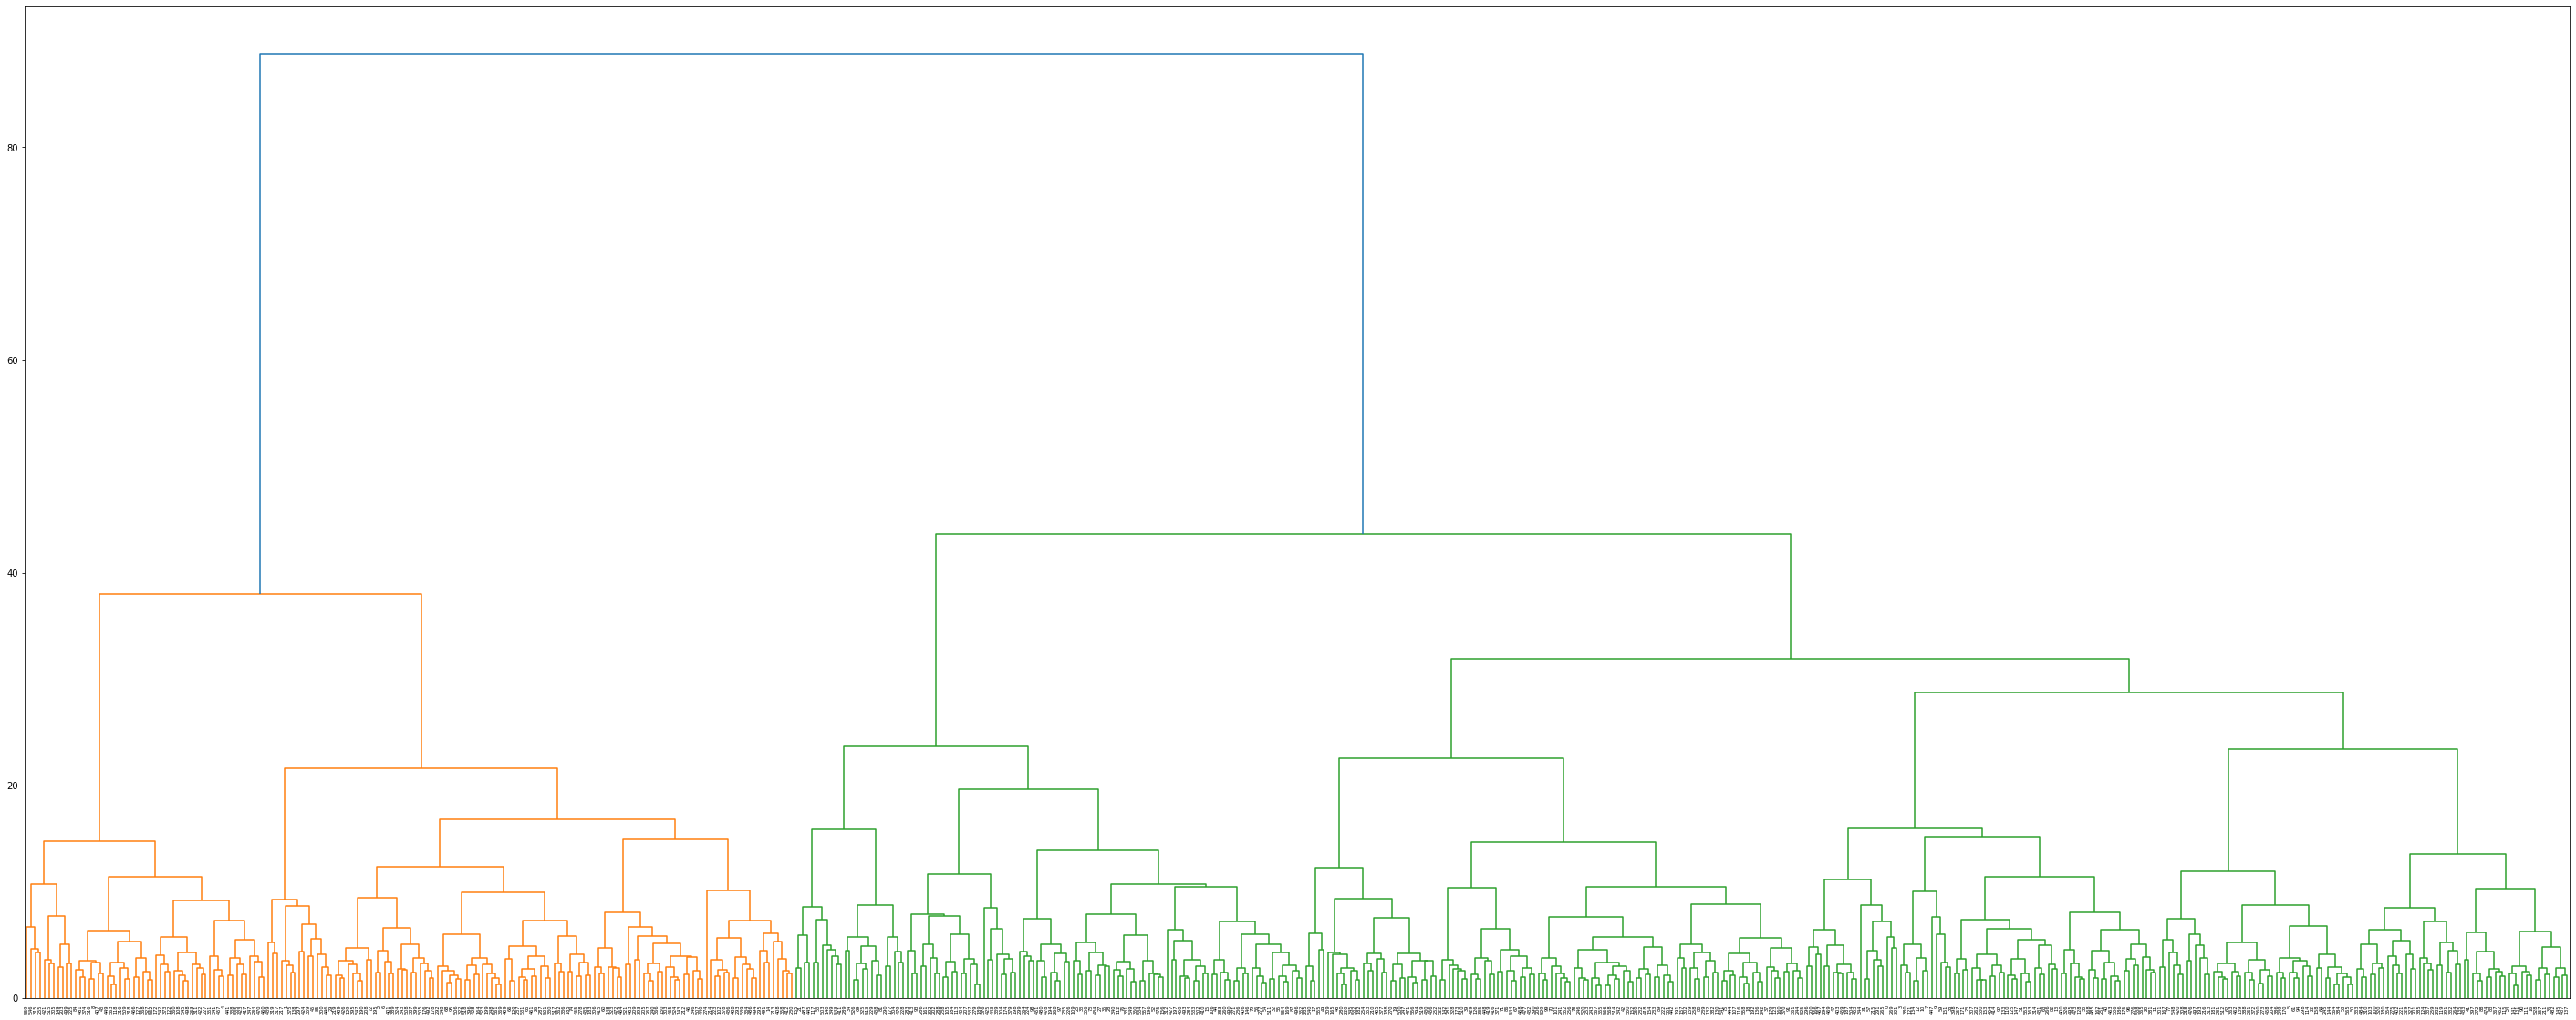

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=None , distance_threshold=0 , linkage='ward')
label_agg = agg.fit_predict(features)

fig, ax = plt.subplots(1, 1, figsize=(50, 20))

linked = hierarchy.linkage(features, 'ward')
labels_dend = label_agg
hierarchy.dendrogram(linked,
           orientation='top', labels = labels_dend,
           show_leaf_counts=True,
           ax=ax)
plt.show()